<a href="https://colab.research.google.com/github/joymuli10/K-NN-and-Naive-Bayes/blob/main/Naive_Bayes_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a). Specifying the Question



> Build a model that determines whether an email is a spam or not.



## b). Defining the Metric for Success



> This project will be considered a success when we are able to develop a reliable prediction model that has the best accuracy score.



## c). Understanding the Context



> Email spam is unsolicited messages sent in bulk by email (spamming). The name comes from a Monty Python sketch in which Spam is ubiquitous, unavoidable, and repetitive. Email spam has steadily grown since the early 1990s, and by 2014 was estimated to account for around 90% of total email traffic. Since the expense of the spam is borne mostly by the recipient, it is effectively postage due advertising. This makes it an excellent example of a negative externality. The legal definition and status of spam varies from one jurisdiction to another, but nowhere have laws and lawsuits been particularly successful in stemming spam. Most email spam messages are commercial in nature. Whether commercial or not, many are not only annoying, but also dangerous because they may contain links that lead to phishing web sites or sites that are hosting malware - or include malware as file attachments. 


> The study uses Naive Bayes Model to predict whether an email is spam or not.





## d). Recording the experimental design



> Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

1. Load data and preview data
2. Data Cleaning
3. Exploratory Analysis
4. Implementing the Solution
5. Challenging the Solution
6. Follow Up Question



## Appropriateness of the data



> The data to be used was downloaded online and has 4601 rows and 58 columns. The columns are the frequency of times a word has appeared in an email. The data was already preprocessed and columns are mostly floats and integers



# Reading the Data

In [1]:
#Importing the libraries to be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
#Loading the dataset 
spam = pd.read_csv('/content/spambase.data', names=( 'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'))

# Checking the data

In [3]:
#Previewing the dataset's head
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#Checking the dataset's bottom
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
#Checking the number of columns and rows
print('Spam dataset shape: {} Rows, {} Columns'.format(*spam.shape))

Spam dataset shape: 4601 Rows, 58 Columns


In [6]:
#Checking the info to see how many non nulls we have the respectve data types of each column
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Cleaning the data

In [7]:
#Checking for duplicates 
spam.duplicated().sum()

391

In [8]:
#Dropping any duplicates
spam = spam.drop_duplicates()
spam.shape

(4210, 58)

In [9]:
#Checking for null values
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre



> There are no null values. We'll do further cleaning to see the unique values and if there are ? as nan 



In [10]:
# Checking for the number of unique values in each column

for column in spam.columns:
  print(column)
  print(spam[column].unique())
  print('\n')

word_freq_make
[0.   0.21 0.06 0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]


word_freq_address
[6.400e-01 2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01
 7.000e-02 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01
 1.920e+00 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01
 4.400e-01 9.400e-01 1.800e-01

In [11]:
#Checking for the data types
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

# Exploratory Analysis

In [12]:
#We check the properties of our dataset
spam.groupby('class').mean()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.072801,0.075421,0.219087,0.000976,0.196448,0.048929,0.009265,0.040952,0.040976,0.178001,0.015824,0.575701,0.067926,0.046124,0.008542,0.072450,0.05196,0.105765,1.349265,0.008348,0.440885,0.049818,0.007428,0.018878,0.942671,0.458100,0.614070,0.200403,0.163165,0.168443,0.104785,0.074342,0.159818,0.074872,0.174710,0.145117,0.213177,0.020624,0.131260,0.077408,0.068878,0.233864,0.076353,0.13757,0.450356,0.304895,0.008783,0.056428,0.054208,0.167851,0.023438,0.120557,0.012299,0.020835,2.407102,19.038325,174.461083
1,0.151948,0.168785,0.400590,0.156694,0.519589,0.168600,0.280596,0.209071,0.168565,0.354574,0.118285,0.549381,0.142472,0.083955,0.099464,0.527248,0.29567,0.313859,2.274771,0.200453,1.366522,0.254848,0.241108,0.199643,0.018237,0.009845,0.001674,0.020298,0.000727,0.006301,0.001376,0.000560,0.015676,0.001918,0.007141,0.030405,0.038422,0.004491,0.012901,0.036962,0.000060,0.002370,0.007195,0.00642,0.123806,0.015235,0.001269,0.002061,0.019593,0.108167,0.008239,0.523199,0.172167,0.083427,9.871248,102.038714,467.132222


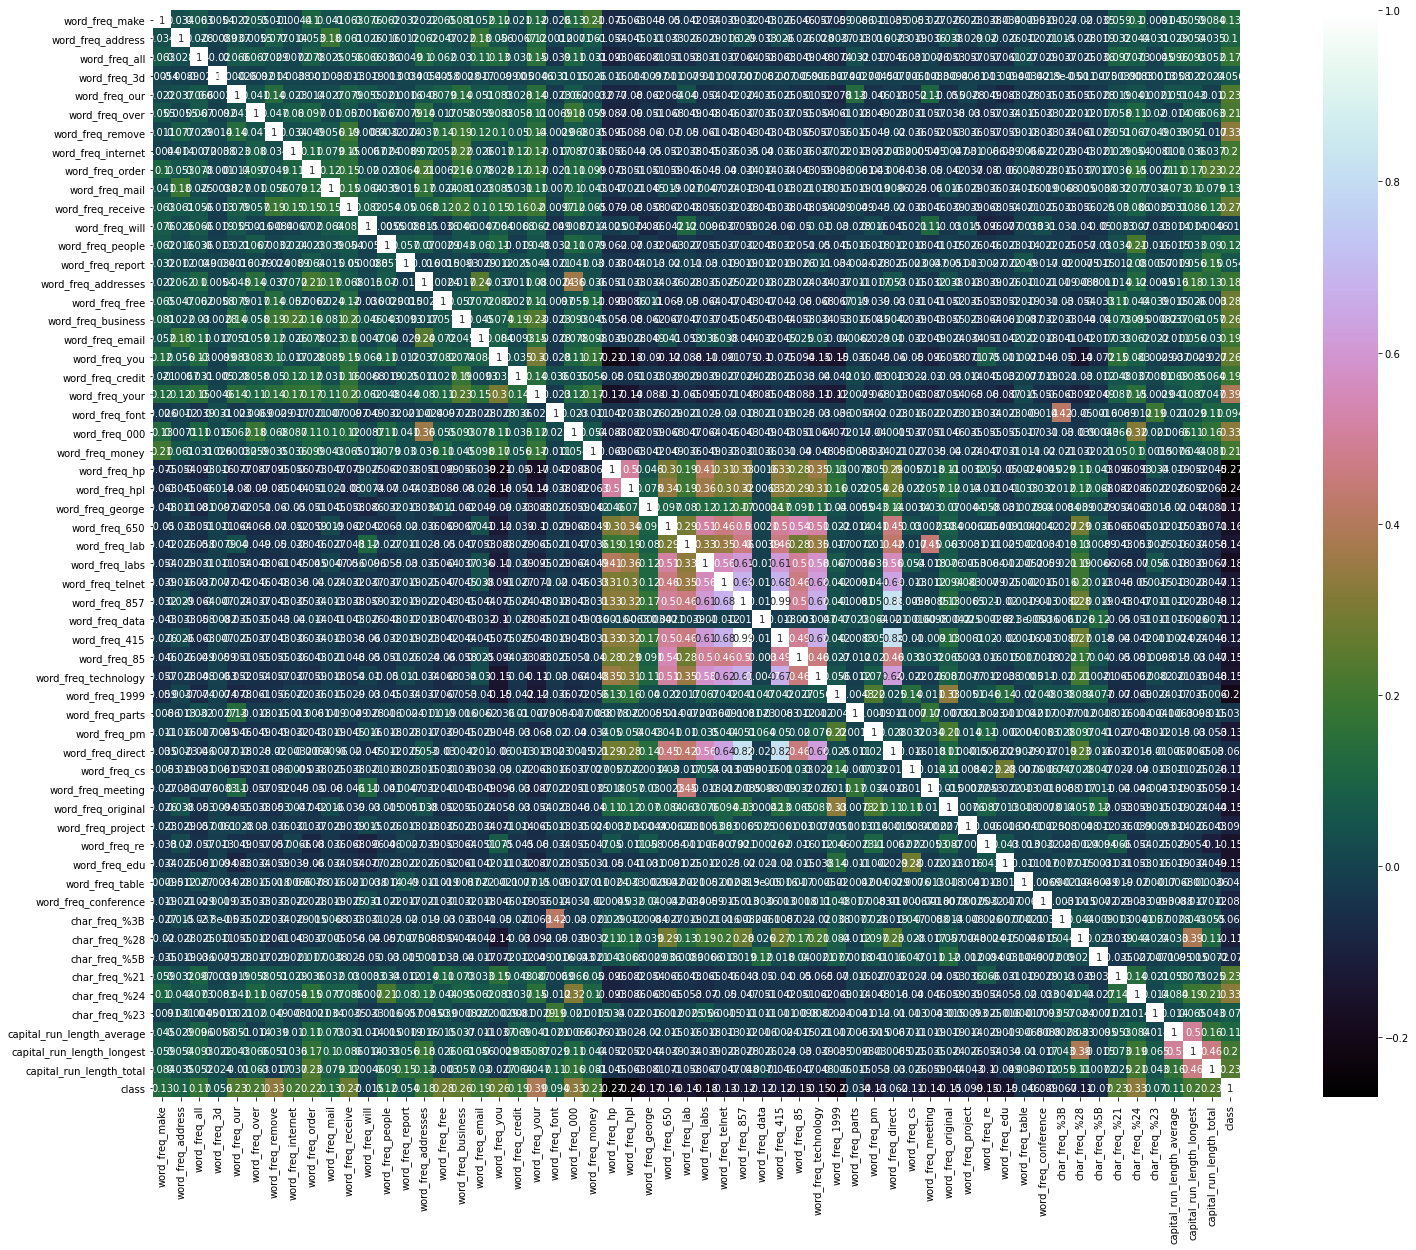

In [13]:
#Plotting a heatmap to see the correlation
corr_mat=spam.corr(method='pearson')
plt.figure(figsize=(30,20))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')



> **Multivariate Analysis**



In [14]:
#I'll use factor analysis to reduce the number of features to use
# remove the status column from the data
spam1 = spam.drop('class', 1)


In [15]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(spam1)
chi_square_value, p_value
#The p value is 0 the observed matrix is not an identity matrix, hence we can continue to perform factor analysis on the data

(58872.5136959734, 0.0)

In [16]:
# Creating factor analysis object and perform factor analysis 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(spam1,25, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# Here, we can see only for 19 eigenvalues(factors) are greater than one. 
# It means we need to choose only 19 factors (or unobserved variables).

,Original_Eigenvalues
0,6.212781
1,3.182213
2,2.012895
3,1.629025
4,1.545574
5,1.468297
6,1.415596
7,1.366958
8,1.294541
9,1.244791


In [17]:
fa = FactorAnalyzer()
fa.analyze(spam1, 19, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19
word_freq_make,-0.034412,0.043204,0.036292,-0.017219,-0.030547,-0.020811,-0.012627,0.042973,-0.001706,-0.013183,-0.017023,0.346261,0.107920,0.093906,0.010793,0.008420,0.106434,0.019114,0.003585
word_freq_address,-0.002225,0.007916,0.020987,-0.009759,0.029099,-0.033841,0.034290,-0.026322,-0.011313,-0.028953,0.200117,0.043087,0.087100,-0.010981,-0.085947,0.375800,0.025249,0.025659,0.017790
word_freq_all,-0.044480,0.021759,0.102654,-0.050542,-0.048269,-0.047177,-0.038154,0.120475,-0.013588,-0.048335,0.091357,0.050403,0.183122,0.121827,0.041908,-0.026216,0.034872,-0.058929,0.143979
word_freq_3d,-0.007438,-0.001645,0.018414,-0.000713,0.027985,-0.012186,-0.016218,0.005428,-0.010290,-0.008454,0.021578,0.036697,-0.024028,-0.026462,-0.004674,-0.014529,0.006673,0.018105,-0.009319
word_freq_our,-0.027915,0.110241,0.028437,0.041009,-0.025924,-0.049194,-0.063336,0.026544,-0.016871,-0.077991,0.040326,-0.041353,0.090024,0.089587,-0.028706,0.020531,0.000662,0.109308,0.377941
word_freq_over,-0.039599,0.114862,-0.006550,-0.041369,0.000253,-0.044747,-0.052487,0.202735,0.022158,-0.022202,0.022780,0.057222,0.083376,0.012867,-0.019450,-0.059004,0.114204,0.014119,0.018857
word_freq_remove,-0.038454,0.220461,0.012416,-0.053632,0.011079,-0.046977,-0.060647,-0.024441,-0.016596,-0.051280,0.170802,-0.006177,0.088819,0.002201,-0.020126,0.075863,0.009337,0.262499,0.149882
word_freq_internet,-0.031334,0.385080,-0.018091,0.006255,-0.027755,-0.003927,-0.000026,0.075134,-0.003734,-0.009986,-0.012151,-0.024978,0.042191,-0.039793,0.003660,0.023385,0.015841,0.013943,-0.055058
word_freq_order,-0.027529,0.307663,0.148720,-0.019501,-0.023673,-0.011064,-0.034565,0.186669,-0.032050,-0.018304,0.013968,0.150291,-0.055931,0.007250,-0.013880,0.123222,0.126145,-0.143676,0.006596
word_freq_mail,-0.004973,0.129193,0.061432,-0.023219,0.020268,0.002856,0.001438,0.110838,-0.000838,-0.013822,-0.057527,0.006018,0.053182,0.079833,0.084508,0.493408,0.044301,0.066281,-0.035819


factor 1 - word_freq_857, word_freq_telnet, word_freq_labs,
factor 2 - word_freq_business
factor 3 - capital_run_length_average
factor 4 - word_freq_lab
factor 5 - word_freq_font
factor 6 - word_freq_hp, word_freq_hpl
factor 7 - word_freq_original, word_freq_1999
factor 8 - word_freq_addresses
factor 9 - char_freq_%28
factor 10 - word_freq_cs
factor 11 - word_freq_email
factor 12 - word_freq_make
factor 13 - word_freq_you
factor 14 - word_freq_will
factor 15 - word_freq_650
factor 16 - word_freq_mail
factor 17 - char_freq_%21
factor 18 - word_freq_remove
factor 19 - word_freq_parts

In [18]:
#Creating a new dataset with reduced features
spam_clean = spam[['word_freq_857', 'word_freq_telnet', 'word_freq_labs', 'word_freq_business', 'capital_run_length_average',
                   'word_freq_lab', 'word_freq_font', 'word_freq_hp', 'word_freq_hpl', 'word_freq_original', 'word_freq_1999',
                   'word_freq_addresses', 'char_freq_%28', 'word_freq_cs', 'word_freq_email', 'word_freq_make', 'word_freq_you',
                   'word_freq_will', 'word_freq_650', 'word_freq_mail', 'char_freq_%21', 'word_freq_remove', 'word_freq_parts', 'class']]

In [19]:
# Getting variance of each factors

fa.get_factor_variance()

# Noting total 35% cumulative Variance explained by the 19 factors.
# We conclude that the we have found 19 factors that contribute highly to an email being spam or not

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19
SS Loadings,5.451303,1.151037,1.358622,1.158774,1.240173,1.030594,0.934521,1.015105,1.025092,0.756938,0.576683,0.574989,0.850410,0.521182,0.481748,0.530561,0.795018,0.348215,0.439815
Proportion Var,0.095637,0.020194,0.023835,0.020329,0.021757,0.018081,0.016395,0.017809,0.017984,0.013280,0.010117,0.010088,0.014919,0.009144,0.008452,0.009308,0.013948,0.006109,0.007716
Cumulative Var,0.095637,0.115831,0.139666,0.159995,0.181753,0.199833,0.216228,0.234037,0.252021,0.265301,0.275418,0.285506,0.300425,0.309569,0.318021,0.327329,0.341276,0.347385,0.355101


In [20]:
# describing the dataset
spam_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_freq_857,4210.0,0.044917,0.300748,0.0,0.0000,0.000,0.00000,4.760
word_freq_telnet,4210.0,0.063544,0.387267,0.0,0.0000,0.000,0.00000,12.500
word_freq_labs,4210.0,0.103779,0.439568,0.0,0.0000,0.000,0.00000,5.880
word_freq_business,4210.0,0.149154,0.457669,0.0,0.0000,0.000,0.00000,7.140
capital_run_length_average,4210.0,5.383896,33.147358,1.0,1.6275,2.297,3.70675,1102.500
word_freq_lab,4210.0,0.098382,0.576796,0.0,0.0000,0.000,0.00000,14.280
word_freq_font,4210.0,0.131587,1.071258,0.0,0.0000,0.000,0.00000,17.100
word_freq_hp,4210.0,0.573995,1.676539,0.0,0.0000,0.000,0.09750,20.830
word_freq_hpl,4210.0,0.279330,0.905553,0.0,0.0000,0.000,0.00000,16.660
word_freq_original,4210.0,0.048772,0.231871,0.0,0.0000,0.000,0.00000,3.570




> Now I'm going to predict whether an email is spam or not by performing supervised learning algorithms on the dataset. The model to be used is Naive Bayes Classifier. Our data set is ready to be sed and so I'll divide them into the target and feature variables before implementing the model. I'll also try to improve the model's performance.





> Having a recap of the question. 
Build a model that determines whether an email is spam or not.



# Naive Bayes (Gaussian)

In [21]:
#Checking if our data set is normal
# importing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(spam_clean.word_freq_make )
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.392, p=0.000
Sample does not look Gaussian


In [22]:
# Assigning values to our features and target
X = spam_clean.drop("class", axis=1)
y = spam_clean['class']

# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [23]:
from sklearn.naive_bayes import GaussianNB
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [24]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(predicted)
print(y_test)
print(np.mean(predicted == y_test))

[0 1 1 ... 1 1 1]
3394    0
1193    1
2739    0
503     1
1951    0
       ..
28      1
3659    0
2883    0
3379    0
1014    1
Name: class, Length: 1263, dtype: int64
0.6825019794140934


In [25]:
# Making predictions
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[360 379]
 [ 22 502]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       739
           1       0.57      0.96      0.71       524

    accuracy                           0.68      1263
   macro avg       0.76      0.72      0.68      1263
weighted avg       0.79      0.68      0.67      1263



## Model Performance



> Naive Bayes' Model performance can be improved by:
 1. Normalizing the data set
 2. Remove correlated features
 3. Performing data processing
 4. Apply smoothing techniques





> **Normalizing the dataset**



In [38]:
# Assigning values to our features and target
X = spam_clean.drop("class", axis=1)
y = spam_clean['class']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# Using minmaxscaler to normalize since the features are continuous
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(X_train, X_test)
# Transform feature matrix
scaler.transform(X)

array([[0.        , 0.        , 0.        , ..., 0.02395468, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01145391, 0.02888583,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00849806, 0.0261348 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00384876, 0.        ,
        0.        ]])

In [40]:
#Fitting the model
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

# Evaluating the model
predicted = model.predict(X_test)
predicted
print(np.mean(predicted == y_test))

0.6825019794140934


In [41]:
# Making predictions
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[360 379]
 [ 22 502]]
              precision    recall  f1-score   support

           0       0.94      0.49      0.64       739
           1       0.57      0.96      0.71       524

    accuracy                           0.68      1263
   macro avg       0.76      0.72      0.68      1263
weighted avg       0.79      0.68      0.67      1263





> Normalizing the dataset had no effect on the model as the accuracy still stands at 68.25%





> **Dropping correlated features.** 



In [29]:
#Dropping correlated features
# Create correlation matrix
corr_matrix = spam_clean.corr().abs()
corr_matrix

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
spam_clean.drop(spam_clean[to_drop], axis=1)
spam_clean.shape

(4210, 24)



> From this we could see that no columns were dropped hence means that there were no correlated features to drop.





> **Applying smoothing techniques**



In [30]:
# Previewing the parameters to tune
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

# Training our model
clf = GaussianNB()  
model = clf.fit(X_train, y_train, sample_weight=1)

# Predicting our test predictors
predicted = model.predict(X_test)
# print(predicted)
# print(y_test)
print(np.mean(predicted == y_test))

0.6825019794140934


# Recommendations



> The model gave an accuracy of 68.25%. This is not a good performance and hence the model should be improved. 



## Follow up questions 



> a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

> b). Do we need other data to answer our questions? Yes. 

> c). Did we have the right question? Yes. 





